# Модель анализатора фото

In [1]:
import os

dataset_path = "image/"
print(os.listdir(dataset_path))


['alfredo', 'broccoli', 'brownie', 'cake', 'carrot', 'cereal', 'cheese', 'chicken', 'chocolate', 'coffee', 'cookie', 'corn', 'couscous', 'crab', 'donut', 'egg', 'fajitas', 'fries', 'grilledcheese', 'hotdog', 'icecream', 'macncheese', 'nachos', 'nuggets', 'rice', 'salad', 'salmon', 'shrimp', 'soup', 'steak', 'sushi', 'tartare']


## Загружаем изображения

И обрабатываем аугментацией (сдвиги повороты)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width = 224, 224
batch_size = 32


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        # Поворот изображения
    width_shift_range=0.2,    # Сдвиг по ширине
    height_shift_range=0.2,   # Сдвиг по высоте
    shear_range=0.2,          # Искажение (shear)
    zoom_range=0.2,           # Масштабирование
    horizontal_flip=True,     # Отражение по горизонтали                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    fill_mode='nearest'       # Заполнение пикселей после трансформации
)

# Пересоздаем генераторы с аугментацией
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 7609 images belonging to 32 classes.
Found 1881 images belonging to 32 classes.


## Анализ данных 

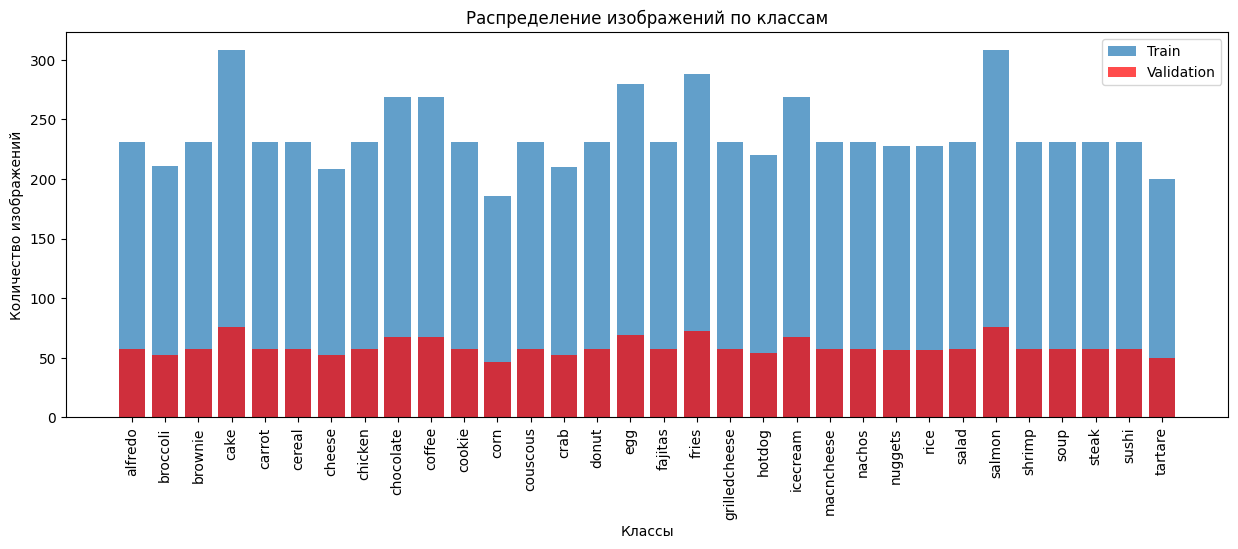

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Получаем список классов
class_labels = list(train_generator.class_indices.keys())

# Считаем количество изображений в каждом классе
train_counts = np.bincount(train_generator.classes)
val_counts = np.bincount(validation_generator.classes)

# Строим график распределения классов
plt.figure(figsize=(15, 5))
plt.bar(class_labels, train_counts, label="Train", alpha=0.7)
plt.bar(class_labels, val_counts, label="Validation", alpha=0.7, color='red')
plt.xticks(rotation=90)
plt.xlabel("Классы")
plt.ylabel("Количество изображений")
plt.title("Распределение изображений по классам")
plt.legend()
plt.show()


## Создаем и обучаем модель

In [4]:
from tensorflow.keras import layers, models

# Определяем параметры модели
input_shape = (img_height, img_width, 3)
num_classes = len(train_generator.class_indices)

# Определяем архитектуру модели CNN
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Регуляризация для избежания переобучения
        layers.Dense(num_classes, activation='softmax')  # Классификация на 32 класса
    ])

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Выводим архитектуру модели
model.summary()


c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,088 (42.62 MB)

 Trainable params: 11,173,088 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

Обучение

In [5]:
history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=validation_generator
)

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.0712 - loss: 3.4242 - val_accuracy: 0.4189 - val_loss: 1.9629
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 215s 903ms/step - accuracy: 0.3310 - loss: 2.1286 - val_accuracy: 0.6427 - val_loss: 1.1963
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 218s 915ms/step - accuracy: 0.5049 - loss: 1.4916 - val_accuracy: 0.7267 - val_loss: 0.8650
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 216s 906ms/step - accuracy: 0.5837 - loss: 1.2302 - val_accuracy: 0.7762 - val_loss: 0.7092
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 213s 896ms/step - accuracy: 0.6267 - loss: 1.0713 - val_accuracy: 0.8352 - val_loss: 0.5972
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 202s 848ms/step - accuracy: 0.6819 - loss: 0.9386 - val_accuracy: 0.8522 - val_loss: 0.4584
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 201s 845ms/step - accuracy: 0.7168 - loss: 0.8581 - val_accuracy: 0.8538 - val_loss: 0.4776
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 200s 841ms/step - accuracy: 0.7555 - lo

## Визуализируем процесс обучения

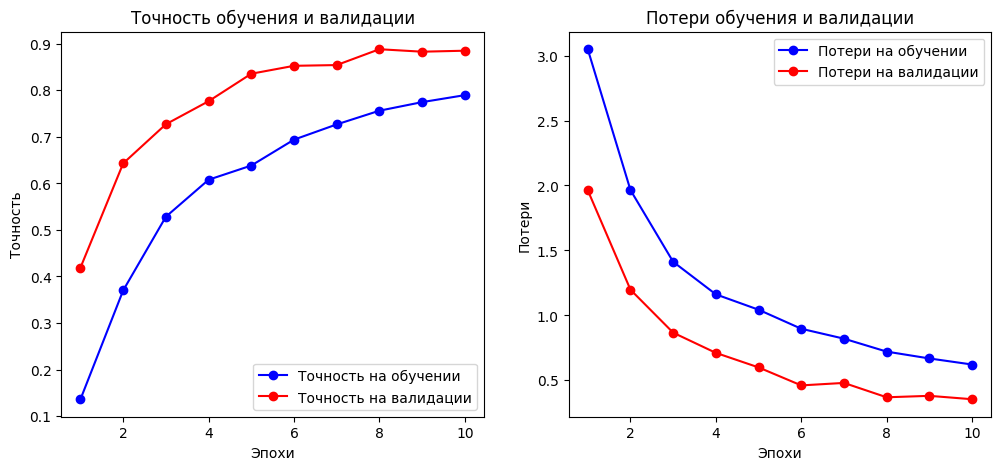

In [6]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Точность на обучении')
plt.plot(epochs, val_acc, 'ro-', label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность обучения и валидации')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Потери на обучении')
plt.plot(epochs, val_loss, 'ro-', label='Потери на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери обучения и валидации')

plt.show()


## Улучшение модели с помощью предобученной сети (Transfer Learning)

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Загружаем предобученную MobileNetV2 (без верхних слоев)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Замораживаем веса базовой модели (чтобы не изменялись при обучении)
base_model.trainable = False

# Добавляем свои слои поверх предобученной модели
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Глобальное усреднение
x = Dense(512, activation='relu')(x)  # Новый полносвязный слой
x = Dropout(0.5)(x)  # Регуляризация
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Выходной слой

# Создаем новую модель
model = Model(inputs=base_model.input, outputs=predictions)

# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Выводим архитектуру модели
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,053,408 (11.65 MB)

 Trainable params: 795,424 (3.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Обучение с transfer learning

In [8]:
# Обучение модели с предобученной сетью
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 223s 923ms/step - accuracy: 0.6604 - loss: 1.2987 - val_accuracy: 0.9904 - val_loss: 0.0375
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 211s 887ms/step - accuracy: 0.9660 - loss: 0.1111 - val_accuracy: 0.9878 - val_loss: 0.0389
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 212s 890ms/step - accuracy: 0.9747 - loss: 0.0824 - val_accuracy: 0.9931 - val_loss: 0.0338
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 214s 901ms/step - accuracy: 0.9776 - loss: 0.0687 - val_accuracy: 0.9867 - val_loss: 0.0461
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 217s 910ms/step - accuracy: 0.9768 - loss: 0.0732 - val_accuracy: 0.9920 - val_loss: 0.0323
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 215s 902ms/step - accuracy: 0.9853 - loss: 0.0442 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 216s 906ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.9888 - val_loss: 0.0421
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 226s 951ms/step - accuracy: 0.9845 -

## Визуализация дообучения

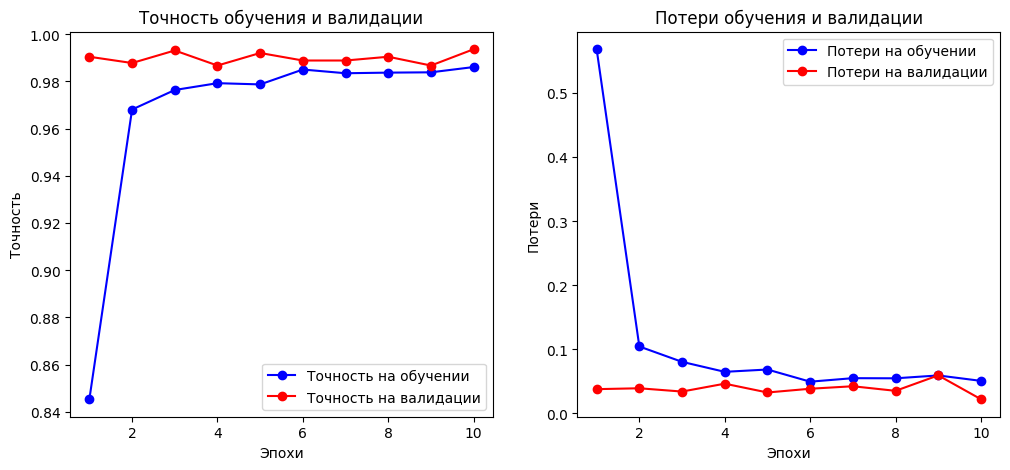

In [9]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Точность на обучении')
plt.plot(epochs, val_acc, 'ro-', label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность обучения и валидации')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Потери на обучении')
plt.plot(epochs, val_loss, 'ro-', label='Потери на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери обучения и валидации')

plt.show()




## Реализация кросс-валидации
Используем K=5 (5-фолдовая кросс-валидация):

In [10]:
from sklearn.model_selection import KFold
import numpy as np

# Параметры кросс-валидации
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# Список для сохранения результатов
fold_accuracies = []

# Генератор данных (используем один набор без разделения train/val)
datagen = ImageDataGenerator(rescale=1./255)
all_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Разбиваем данные на K частей и обучаем модель на каждой из них
for fold, (train_idx, val_idx) in enumerate(kf.split(all_data)):
    print(f"\n🔹 **Обучение на фолде {fold+1}/{k_folds}**")

    # Создаем новую модель MobileNetV2 для каждого фолда
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Замораживаем веса

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Обучаем модель
    history = model.fit(
        all_data,
        epochs=5,  # Уменьшаем количество эпох для быстрой проверки
        verbose=1
    )

    # Сохраняем точность для каждого фолда
    final_acc = history.history['accuracy'][-1]
    fold_accuracies.append(final_acc)

# Средняя точность по всем фолдам
mean_acc = np.mean(fold_accuracies)
print(f"\n✅ **Средняя точность на {k_folds}-фолдовой кросс-валидации: {mean_acc:.4f}**")


Found 9490 images belonging to 32 classes.

🔹 **Обучение на фолде 1/5**
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 164s 537ms/step - accuracy: 0.7195 - loss: 1.0424
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 146s 490ms/step - accuracy: 0.9838 - loss: 0.0612
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 150s 505ms/step - accuracy: 0.9860 - loss: 0.0475
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 146s 490ms/step - accuracy: 0.9918 - loss: 0.0322
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 495ms/step - accuracy: 0.9925 - loss: 0.0236

🔹 **Обучение на фолде 2/5**
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 153s 501ms/step - accuracy: 0.7295 - loss: 1.0377
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 495ms/step - accuracy: 0.9813 - loss: 0.0574
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 156s 525ms/step - accuracy: 0.9821 - loss: 0.0534
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - accuracy: 0.9893 - loss: 0.0341
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 450ms/step - accuracy: 0.9901 - loss: 0.0331

🔹 **Обуч

Информация по фолдам:
Фолд 1: 0.9896
Фолд 2: 0.9906
Фолд 3: 0.9911
Фолд 4: 0.9879
Фолд 5: 0.9919

Средняя точность: 0.9902
Стандартное отклонение: 0.0014
Минимум: 0.9879
Максимум: 0.9919


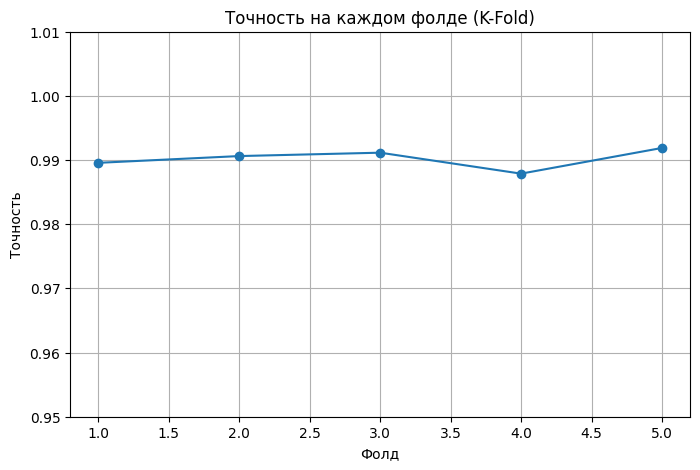

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Расчет статистики
mean_acc = np.mean(fold_accuracies)
std_acc = np.std(fold_accuracies)
min_acc = np.min(fold_accuracies)
max_acc = np.max(fold_accuracies)

print("Информация по фолдам:")
for i, acc in enumerate(fold_accuracies, 1):
    print(f"Фолд {i}: {acc:.4f}")
print(f"\nСредняя точность: {mean_acc:.4f}")
print(f"Стандартное отклонение: {std_acc:.4f}")
print(f"Минимум: {min_acc:.4f}")
print(f"Максимум: {max_acc:.4f}")

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(fold_accuracies)+1), fold_accuracies, marker='o')
plt.title("Точность на каждом фолде (K-Fold)")
plt.xlabel("Фолд")
plt.ylabel("Точность")
plt.ylim(0.95, 1.01)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

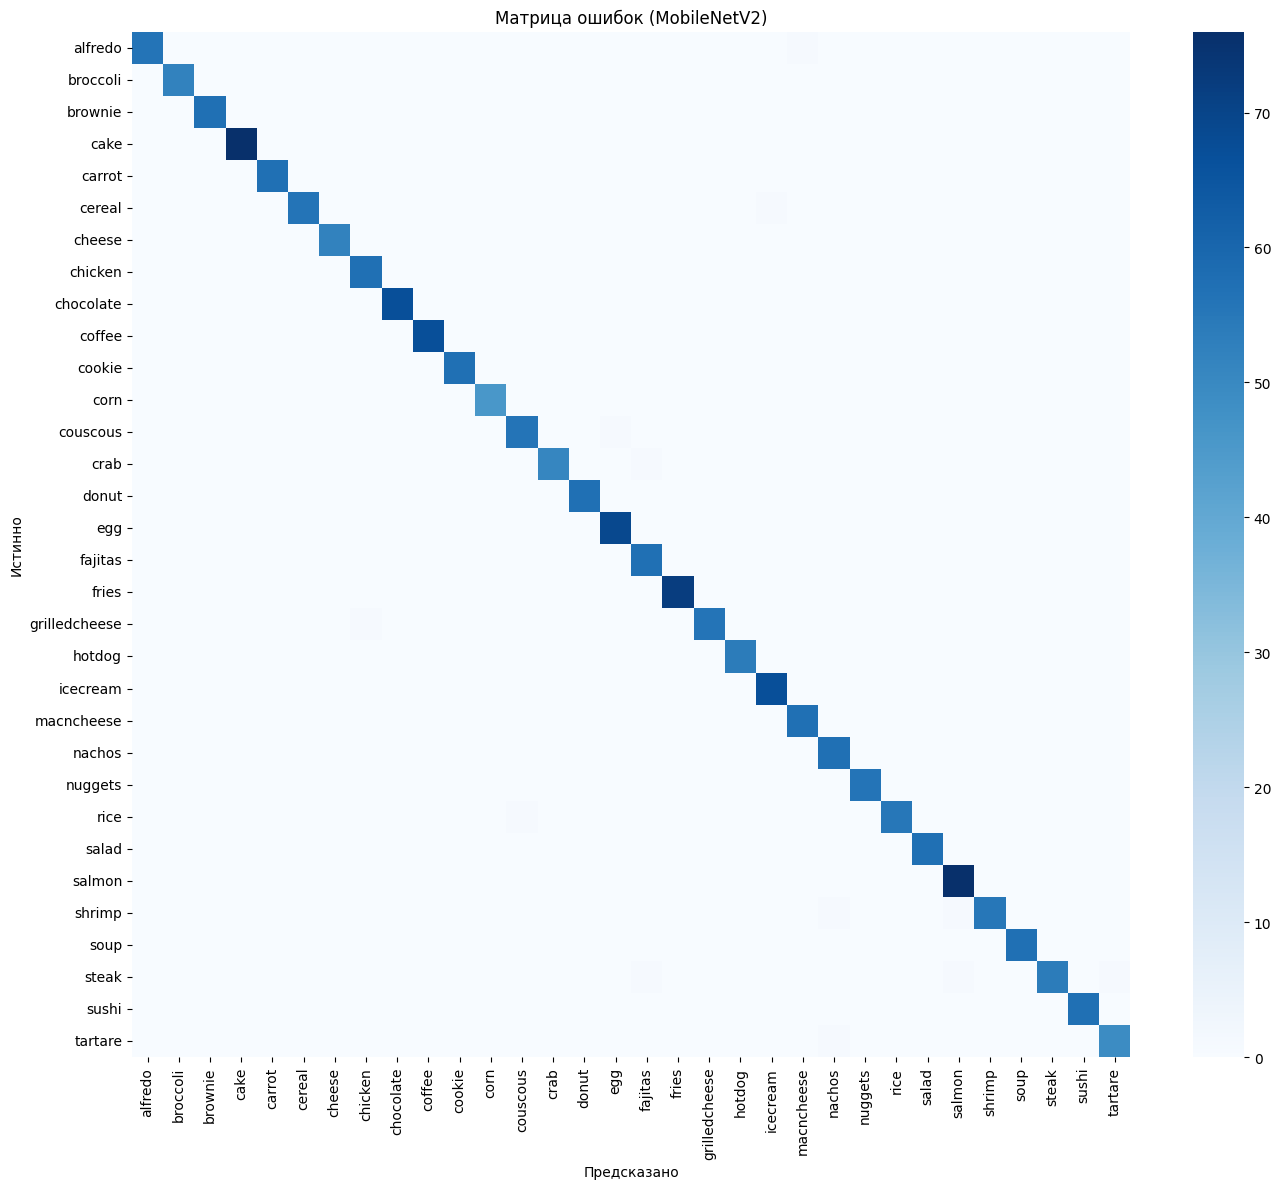

               precision    recall  f1-score   support

      alfredo       1.00      0.98      0.99        57
     broccoli       1.00      1.00      1.00        52
      brownie       1.00      1.00      1.00        57
         cake       1.00      1.00      1.00        76
       carrot       1.00      1.00      1.00        57
       cereal       1.00      0.98      0.99        57
       cheese       1.00      1.00      1.00        52
      chicken       0.98      1.00      0.99        57
    chocolate       1.00      1.00      1.00        67
       coffee       1.00      1.00      1.00        67
       cookie       1.00      1.00      1.00        57
         corn       1.00      1.00      1.00        46
     couscous       0.98      0.98      0.98        57
         crab       1.00      0.98      0.99        52
        donut       1.00      1.00      1.00        57
          egg       0.99      1.00      0.99        69
      fajitas       0.97      1.00      0.98        57
        f

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_true = []
y_pred = []
class_labels = list(train_generator.class_indices.keys())

# Сброс генератора
validation_generator.reset()

# Предсказание по всем батчам
for i in range(len(validation_generator)):
    x_batch, y_batch = next(validation_generator)
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    if i >= validation_generator.samples // validation_generator.batch_size:
        break

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)

# Визуализация
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.title('Матрица ошибок (MobileNetV2)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Отчет по классам
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

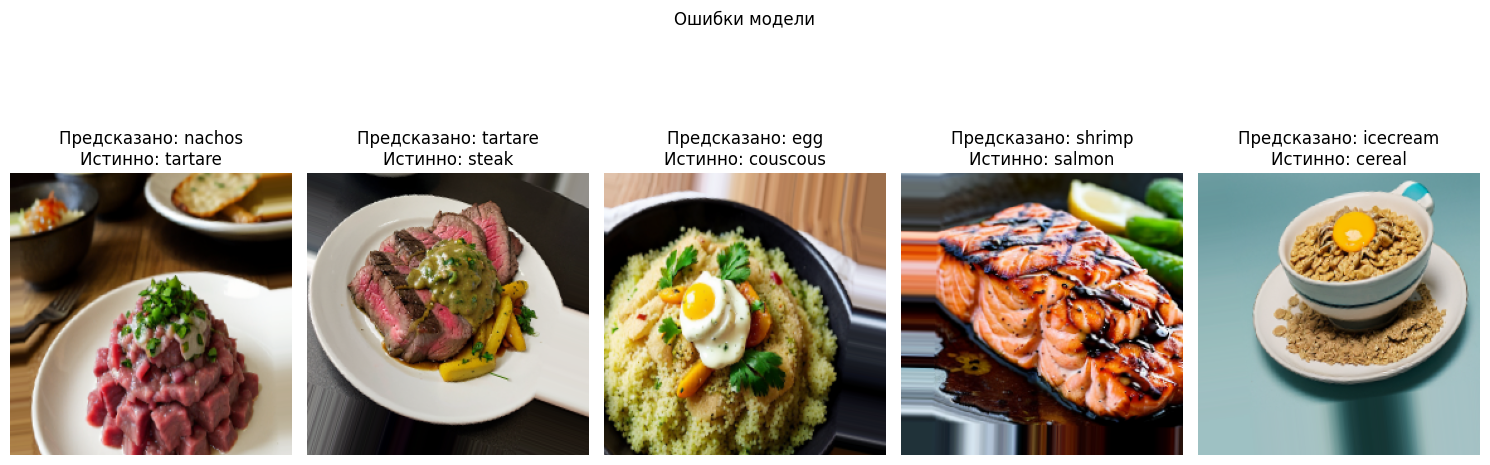

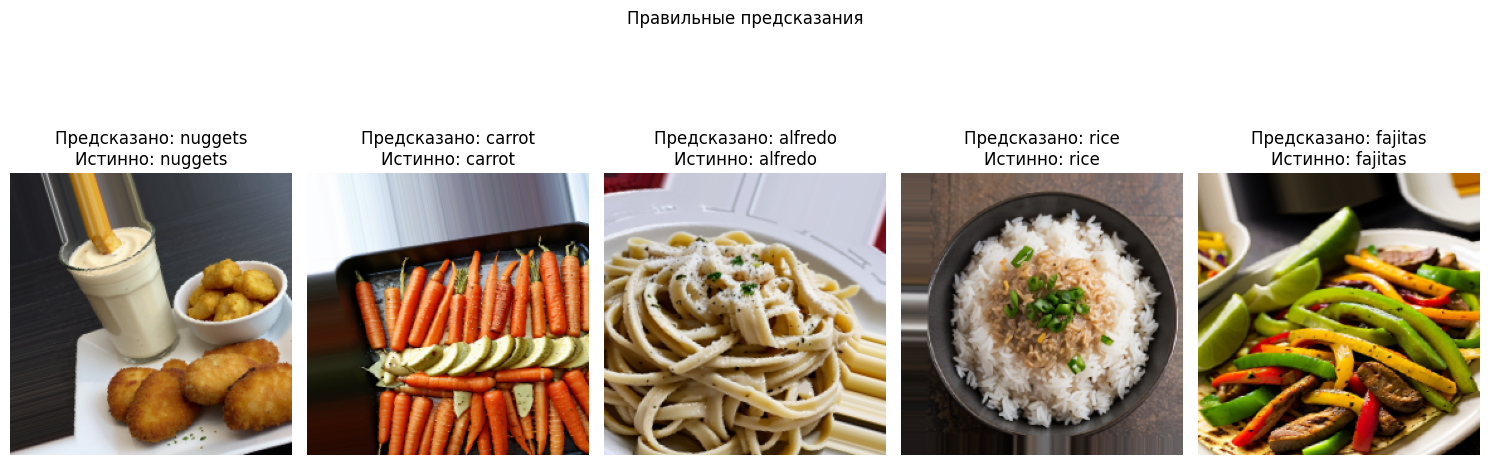

In [13]:
import matplotlib.pyplot as plt

# Количество примеров
num_images_to_show = 5

# Обнуляем
validation_generator.reset()
y_true = []
y_pred = []
images = []

# Получаем батчи и сохраняем изображения
for i in range(len(validation_generator)):
    x_batch, y_batch = next(validation_generator)
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    images.extend(x_batch)
    if len(y_true) >= validation_generator.samples:
        break

# Переводим в массивы
y_true = np.array(y_true)
y_pred = np.array(y_pred)
images = np.array(images)
class_labels = list(validation_generator.class_indices.keys())

# Найдем ошибки
error_indices = np.where(y_true != y_pred)[0]
correct_indices = np.where(y_true == y_pred)[0]

# Функция отображения
def show_images(indices, title):
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices[:num_images_to_show]):
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(f"Предсказано: {class_labels[y_pred[idx]]}\nИстинно: {class_labels[y_true[idx]]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Покажем ошибки
show_images(error_indices, "Ошибки модели")

# Покажем правильные предсказания
show_images(correct_indices, "Правильные предсказания")


Сохраняем модель

In [14]:
# Сохраняем модель как .h5
model.save("content/food_classifier_model.h5")


# Вторая модель

## Загрузка первой модели в переменную

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Загружаем модель
model = load_model('content/food_classifier_model.h5')
img_height, img_width = 224, 224

## Функции, которые работают с первой моделью

In [16]:
import os
import random

# Разбираем папки в image на классы
def get_class_labels():
    classes_dir = os.path.join('image')
    return sorted([d for d in os.listdir(classes_dir) 
                 if os.path.isdir(os.path.join(classes_dir, d))])

# Пытаемся сделать рандомный выбор
def get_random_photo():
    root_folder = "image"
    class_folders = [d for d in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, d))]
    random_class = random.choice(class_folders)
    class_path = os.path.join(root_folder, random_class)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    random_image = random.choice(image_files)
    img_path = os.path.join(class_path, random_image)
    # print(f"Класс: {random_class}")
    # print(f"Файл: {random_image}")
    # print(f"Полный путь: {img_path}")
    return img_path

# Предсказание класса по изображению
def predict_class(model, img_path):
    # Получаем метки классов из структуры датасета
    class_labels = get_class_labels()
    # print(class_labels)
    
    # Загрузка и обработка изображения
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = model.predict(img_array)
    return class_labels[np.argmax(pred)] #, np.max(pred) # Возвращаем предсказанное блюдо и вероятность "правильности"



# Проверка
predicted_label = predict_class(model, get_random_photo())

print(f"Предсказанное блюдо: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
Предсказанное блюдо: nuggets


## Зависимости

In [17]:
!pip install -q huggingface_hub
!pip install transformers accelerate



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 354.7/354.7 kB 957.0 kB/s eta 0:00:00
     -------------------------------------- 204.2/204.2 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 134.9/134.9 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 11.0 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Вход и установка

In [18]:
from huggingface_hub import login
login(token="")

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_id = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model_neo = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",            # Использует GPU, если доступен
    torch_dtype=torch.float16     # Используй float32, если нет GPU
)

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Sergeja\.cache\huggingface\hub\models--mistralai--Mistral-7B-Instruct-v0.2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading checkpoint shards: 100%|██████████| 3/3 [00:29<00:00,  9.80s/it]


## Функции для работы второй модели

In [20]:
def get_prompt(dish_name):
    return f"[INST] Ты диетолог. Оцени, сколько калорий примерно содержит блюдо '{dish_name}'. Укажи калорийность и кратко прокомментируй, подходит ли оно для сбалансированного питания. [/INST]"

# Токенизация с перемещением на устройство модели
def get_answer_from_neo(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model_neo.device)

    # Генерация текста
    output = model_neo.generate(
        input_ids,
        do_sample=True,
        temperature=0.7,
        max_new_tokens=100,  
        pad_token_id=tokenizer.eos_token_id,
        top_p = 0.85,
        repetition_penalty=1.1,
        no_repeat_ngram_size=3
    )

    # Декодируем только сгенерированную часть (исключая промпт)
    generated_text = tokenizer.decode(output[0][input_ids.shape[1]:], skip_special_tokens=True)

    return generated_text

## Ответ модели

In [21]:
# проверка
print("Ответ нео:\n" )
promt = get_prompt(predict_class(model,get_random_photo()))
print(promt)
print(get_answer_from_neo(promt))

Ответ нео:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


[INST] Ты диетолог. Оцени, сколько калорий примерно содержит блюдо 'fajitas'. Укажи калорийность и кратко прокомментируй, подходит ли оно для сбалансированного питания. [/INST]
As a dietitian, I'd be happy to help you estimate the calorie content of Fajitas based on typical ingredients. However, it's important to note that calorie counts can vary depending on specific recipe and portion sizes.

A traditional Fajita meal for one serving (around 300g) usually includes:
- 125g grilled chicken or beef (approx. 215 calories)
- Two small (6 inch
